## ライブラリ読み込み

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from bs4 import BeautifulSoup
import requests

In [227]:
# サッカー試合結果まとめサイト
# 2012-2018までデータが存在
# url = 'http://www.football-lab.jp/ka-f/match/?year=2017'
# url = 'http://www.football-lab.jp/ka-f/match/'

## データ読み込み

In [235]:
# チーム名読み込み
df_tm = pd.read_csv('team.csv',sep=',', encoding="utf_8")
tm_list = df_tm.iloc[:,0]
tm_url_list = df_tm.iloc[:,3]

In [349]:
# 空のDataFrameを作成
url = 'http://soccer.from.tv/team/276/y17/'
data = pd.io.html.read_html(url)[3]
df_raw = DataFrame(data)
df = pd.DataFrame(columns = df_raw.iloc[0,0:])
df['tm']=''

In [350]:
# 対戦結果データのスクレイピング
for obs_tm in tm_url_list: 
    for i_year in range(7):

    # 対戦情報を取得
        print(obs_tm)
        year = i_year+12
        url = 'http://soccer.from.tv/team/{}/y{}/'.format(obs_tm, year)
        print(url)
        
        df_raw = DataFrame(data)
        df2=df_raw.iloc[1:,0:]
        df2.columns = df_raw.iloc[0,0:]

        # データを取得
        result = requests.get(url)
        c = result.content
        soup = BeautifulSoup(c, "html.parser")
        tm = soup.find("div", attrs={"class": "page_title"}).b.string
        df2['tm']=tm
        
        df = df.append(df2)
df

276
http://soccer.from.tv/team/276/y12/
276
http://soccer.from.tv/team/276/y13/
276
http://soccer.from.tv/team/276/y14/
276
http://soccer.from.tv/team/276/y15/
276
http://soccer.from.tv/team/276/y16/
276
http://soccer.from.tv/team/276/y17/
276
http://soccer.from.tv/team/276/y18/
294
http://soccer.from.tv/team/294/y12/
294
http://soccer.from.tv/team/294/y13/
294
http://soccer.from.tv/team/294/y14/
294
http://soccer.from.tv/team/294/y15/
294
http://soccer.from.tv/team/294/y16/
294
http://soccer.from.tv/team/294/y17/
294
http://soccer.from.tv/team/294/y18/
176
http://soccer.from.tv/team/176/y12/
176
http://soccer.from.tv/team/176/y13/
176
http://soccer.from.tv/team/176/y14/
176
http://soccer.from.tv/team/176/y15/


KeyboardInterrupt: 

In [276]:
df

,年月日,試合,節/回戦,H/A,スコア,相手,SH,被SH,天候,試合会場,J公式,tm
1,2017/12/02,J1,第34節,H,○ 3 - 2,鳥栖,9,7,屋内,札幌ド,詳細,札幌
2,2017/11/26,J1,第33節,A,○ 1 - 0,G大阪,5,5,曇,吹田Ｓ,詳細,札幌
3,2017/11/18,J1,第32節,A,○ 2 - 0,清水,7,7,雨のち曇,アイスタ,詳細,札幌
4,2017/10/29,J1,第31節,H,● 1 - 2,鹿島,4,12,屋内,札幌ド,詳細,札幌
5,2017/10/21,J1,第30節,A,○ 2 - 1,FC東京,13,6,雨,味スタ,詳細,札幌
6,2017/10/14,J1,第29節,H,○ 3 - 0,柏,5,11,晴,札幌厚別,詳細,札幌
7,2017/09/30,J1,第28節,A,△ 1 - 1,広島,10,8,晴,Ｅスタ,詳細,札幌
8,2017/09/23,J1,第27節,H,△ 2 - 2,新潟,10,12,屋内,札幌ド,詳細,札幌
9,2017/09/16,J1,第26節,A,● 0 - 2,神戸,9,15,雨,神戸ユ,詳細,札幌
10,2017/09/09,J1,第25節,H,○ 2 - 1,磐田,11,6,屋内,札幌ド,詳細,札幌


In [327]:
# 試合結果フラグを作成
df.loc[df['スコア'].str.contains('○'),'match_result'] = 'W'
df.loc[df['スコア'].str.contains('●'),'match_result'] = 'L'
df.loc[df['スコア'].str.contains('△'),'match_result'] = 'D'

# 得失点を抽出
df['goals_for'] = df['スコア'].str[2]
df['goals_against'] = df['スコア'].str[6]

# 型変換
df['goals_for'] = df['goals_for'].astype(np.int64)
df['goals_against'] = df['goals_against'].astype(np.int64)

# 得失点差を計算
df['goals_difference'] = df['goals_for'] - df['goals_against']

In [328]:
df

,年月日,試合,節/回戦,H/A,スコア,相手,SH,被SH,天候,試合会場,J公式,tm,result,goals_for,goals_against,goals_difference,match_result
1,2017/12/02,J1,第34節,H,○ 3 - 2,鳥栖,9,7,屋内,札幌ド,詳細,札幌,W,3,2,1,W
2,2017/11/26,J1,第33節,A,○ 1 - 0,G大阪,5,5,曇,吹田Ｓ,詳細,札幌,W,1,0,1,W
3,2017/11/18,J1,第32節,A,○ 2 - 0,清水,7,7,雨のち曇,アイスタ,詳細,札幌,W,2,0,2,W
4,2017/10/29,J1,第31節,H,● 1 - 2,鹿島,4,12,屋内,札幌ド,詳細,札幌,L,1,2,-1,L
5,2017/10/21,J1,第30節,A,○ 2 - 1,FC東京,13,6,雨,味スタ,詳細,札幌,W,2,1,1,W
6,2017/10/14,J1,第29節,H,○ 3 - 0,柏,5,11,晴,札幌厚別,詳細,札幌,W,3,0,3,W
7,2017/09/30,J1,第28節,A,△ 1 - 1,広島,10,8,晴,Ｅスタ,詳細,札幌,D,1,1,0,D
8,2017/09/23,J1,第27節,H,△ 2 - 2,新潟,10,12,屋内,札幌ド,詳細,札幌,D,2,2,0,D
9,2017/09/16,J1,第26節,A,● 0 - 2,神戸,9,15,雨,神戸ユ,詳細,札幌,L,0,2,-2,L
10,2017/09/09,J1,第25節,H,○ 2 - 1,磐田,11,6,屋内,札幌ド,詳細,札幌,W,2,1,1,W


In [331]:
df = df.rename(columns={
    '年月日':'dte', 
    '相手':'tm_opp',
    '節/回戦':'match_round',
    'H/A':'stadium_HA',
    'SH':'sh_for',
    '被SH':'sh_against',
    '試合':'match_type',
    '天候':'weather',
    '試合会場':'stadium'
})

In [339]:
df = df.loc[:,[
    'tm'
    ,'tm_opp'
    ,'match_type'
    ,'match_round'
    ,'stadium'
    ,'stadium_HA'
    ,'dte'
    ,'match_result'
    ,'goals_difference'
    ,'goals_for'
    ,'goals_against'
    ,'weather'
#     ,'goals_player'
    ,'sh_for'
    ,'sh_against'
]]

In [346]:
df.reset_index(drop=True, inplace=True)

In [347]:
df.to_csv('df_res.csv')

In [348]:
df

,tm,tm_opp,match_type,match_round,stadium,stadium_HA,dte,match_result,goals_difference,goals_for,goals_against,weather,sh_for,sh_against
0,札幌,鳥栖,J1,第34節,札幌ド,H,2017/12/02,W,1,3,2,屋内,9,7
1,札幌,G大阪,J1,第33節,吹田Ｓ,A,2017/11/26,W,1,1,0,曇,5,5
2,札幌,清水,J1,第32節,アイスタ,A,2017/11/18,W,2,2,0,雨のち曇,7,7
3,札幌,鹿島,J1,第31節,札幌ド,H,2017/10/29,L,-1,1,2,屋内,4,12
4,札幌,FC東京,J1,第30節,味スタ,A,2017/10/21,W,1,2,1,雨,13,6
5,札幌,柏,J1,第29節,札幌厚別,H,2017/10/14,W,3,3,0,晴,5,11
6,札幌,広島,J1,第28節,Ｅスタ,A,2017/09/30,D,0,1,1,晴,10,8
7,札幌,新潟,J1,第27節,札幌ド,H,2017/09/23,D,0,2,2,屋内,10,12
8,札幌,神戸,J1,第26節,神戸ユ,A,2017/09/16,L,-2,0,2,雨,9,15
9,札幌,磐田,J1,第25節,札幌ド,H,2017/09/09,W,1,2,1,屋内,11,6


## データ読み込み（csv）

In [3]:
df = pd.read_csv('df_res.csv',sep=',', encoding="SHIFT-JIS")

## モデル構築

In [4]:
df_sapp = df[df['tm']=='札幌']

In [5]:
df_sapp

,Unnamed: 0,tm,tm_opp,match_type,match_round,stadium,stadium_HA,dte,match_result,goals_difference,goals_for,goals_against,weather,sh_for,sh_against
0,0,札幌,鳥栖,J1,第34節,札幌ド,H,2017/12/02,W,1,3,2,屋内,9,7
1,1,札幌,G大阪,J1,第33節,吹田Ｓ,A,2017/11/26,W,1,1,0,曇,5,5
2,2,札幌,清水,J1,第32節,アイスタ,A,2017/11/18,W,2,2,0,雨のち曇,7,7
3,3,札幌,鹿島,J1,第31節,札幌ド,H,2017/10/29,L,-1,1,2,屋内,4,12
4,4,札幌,FC東京,J1,第30節,味スタ,A,2017/10/21,W,1,2,1,雨,13,6
5,5,札幌,柏,J1,第29節,札幌厚別,H,2017/10/14,W,3,3,0,晴,5,11
6,6,札幌,広島,J1,第28節,Ｅスタ,A,2017/09/30,D,0,1,1,晴,10,8
7,7,札幌,新潟,J1,第27節,札幌ド,H,2017/09/23,D,0,2,2,屋内,10,12
8,8,札幌,神戸,J1,第26節,神戸ユ,A,2017/09/16,L,-2,0,2,雨,9,15
9,9,札幌,磐田,J1,第25節,札幌ド,H,2017/09/09,W,1,2,1,屋内,11,6


C:\Users\koki.takinai\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


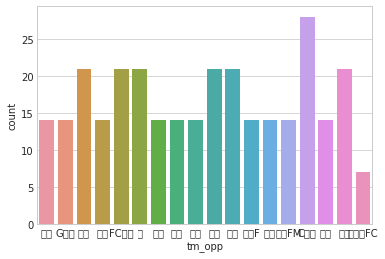

In [6]:
sns.countplot(x='tm_opp',data=df_sapp)

In [8]:
plt.rcParams['font.family'] = 'IPAGothic'

In [15]:
import matplotlib as mpl
print(mpl.matplotlib_fname())

C:\Users\koki.takinai\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc
